In [31]:
from sklearn.mixture import BayesianGaussianMixture
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [15]:
df = pd.read_csv('train.csv')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [104]:
X_train = df[:160000].drop(columns=['ID_code', 'target'])
X_valid = df[160000:].drop(columns=['ID_code', 'target'])

y_train = df[:160000]['target']
y_valid = df[160000:]['target']

# Likelihoods

# Train model

In [105]:
X_train_1 = X_train[y_train==1]
X_train_0 = X_train[y_train==0]
means_vect_1 = X_train_1.mean()
means_vect_0 = X_train_0.mean()
covar_mat_1 = X_train_1.cov()
covar_mat_0 = X_train_0.cov()

P_1 = len(X_train_1)/len(X_train)
P_0 = len(X_train_0)/len(X_train)

print(P_0, P_1)

0.89969375 0.10030625


In [106]:
from scipy.stats import multivariate_normal

# Evaluate Model

In [107]:
def get_odds(X, means_1=means_vect_1, covar_1=covar_mat_1, means_0=means_vect_0, covar_0=covar_mat_0, P_1=P_1, P_0=P_0):
    odds = P_1/P_0*multivariate_normal.pdf(X, mean=means_1, cov=covar_1)/multivariate_normal.pdf(X, mean=means_0, cov=covar_0)
    return odds, np.log(odds)

## Train

In [108]:
odds_train, log_odds_train = get_odds(X_train)

In [109]:
roc_auc_score(y_train, odds_train)

0.9287503016655503

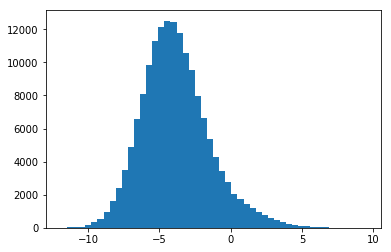

In [110]:
_ = plt.hist(log_odds_train, 50)

## Valid

In [85]:
odds_valid, log_odds_valid = get_odds(X_valid)

In [86]:
roc_auc_score(y_valid, odds_valid)

0.845541596679034

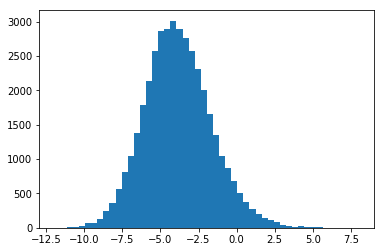

In [88]:
_ = plt.hist(log_odds_valid, 50)

Por que es pero que el Naive Bayes?

Cuantos parámetros tengo?

In [103]:
print(covar_mat_1.shape, covar_mat_0.shape, means_vect_1.shape, means_vect_0.shape)
params = (np.prod(covar_mat_1.shape), np.prod(covar_mat_0.shape), means_vect_1.shape[0], means_vect_0.shape[0])
print(params)
sum(params)

(200, 200) (200, 200) (200,) (200,)
(40000, 40000, 200, 200)


80400